In [2]:
import sys
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
from datetime import datetime, date, time, timedelta
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="whitegrid")

# to view all columns
pd.set_option("display.max.columns", None)

import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

import preprocessor as p

from dotenv import load_dotenv
load_dotenv()

from pathlib import Path
env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smwik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
leaders_username = pd.read_csv('data/leader_usernames.csv')
influencers_username = pd.read_csv('data/influencer_usernames.csv')
leaders_username = list(leaders_username['0'])
influencers_username = list(influencers_username['0'])

In [4]:
Leaders_Tweets = pd.read_csv('data/Leaders_Tweets.csv',delimiter=',') 
Influencers_Tweets = pd.read_csv('data/Influencers_Tweets.csv',delimiter=',')
Leaders_Tweets_User = pd.read_csv('data/Leaders_Tweets_User.csv',delimiter=',')
Influencers_Tweets_User = pd.read_csv('data/Influencers_Tweets_User.csv',delimiter=',')

In [5]:
Leaders_Tweets = Leaders_Tweets.set_index('timestamp').sort_values(by=['timestamp'], ascending=False)
Influencers_Tweets = Influencers_Tweets.set_index('timestamp').sort_values(by=['timestamp'], ascending=False)
Leaders_Tweets_User = Leaders_Tweets_User.set_index('timestamp').sort_values(by=['timestamp'], ascending=False)
Influencers_Tweets_User = Influencers_Tweets_User.set_index('timestamp').sort_values(by=['timestamp'], ascending=False)

In [6]:
#some cleaning to remove redundancies
a = Leaders_Tweets[Leaders_Tweets['retweet_count'] == 'retweet_count' ].index
Leaders_Tweets.drop(a , inplace=True)

b = Influencers_Tweets[Influencers_Tweets['retweet_count'] == 'retweet_count' ].index
Influencers_Tweets.drop(b , inplace=True)

c = Leaders_Tweets_User[Leaders_Tweets_User['retweet_count'] == 'retweet_count' ].index
Leaders_Tweets_User.drop(c , inplace=True)

d = Influencers_Tweets_User[Influencers_Tweets_User['retweet_count'] == 'retweet_count' ].index
Influencers_Tweets_User.drop(d , inplace=True)

In [7]:
Leaders_Tweets_User.groupby('hashtags').source.count()

hashtags
13Mai, Niger, COVID19                            1
16June2020                                       1
1erMai, Niger, COVID19                           1
27Juin2020                                       1
29Ekim                                           1
                                                ..
سنصمدوسنعبروسننتصر                               1
شكراً_مدثر, شكراً_عرابي, سنصمد_وسنعبر_وسننتصر    1
عيد_مبارك                                        1
مؤتمر_شركاء_السودان                              3
من_أجل_الطبيعة, اليوم_العالمي_للبيئة             1
Name: source, Length: 575, dtype: int64

In [8]:
Influencers_Tweets_User.groupby('hashtags').source.count()

hashtags
100daysoflockdown, SoWhatNow                                    1
10AcademyCovid19Response, COVIDー19, covid19kenya, EastAfrica    1
10XDMGathering                                                  1
10xDMGathering                                                  4
10yearsOfBlackMotion, LiveAMP                                   1
                                                               ..
wisdom, meerkat, wildlife                                       1
wuma                                                            1
youth                                                           1
youth, SMMEs                                                    1
youth, TheAfricawewant, Agenda2063, 1mby2021                    1
Name: source, Length: 1232, dtype: int64

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

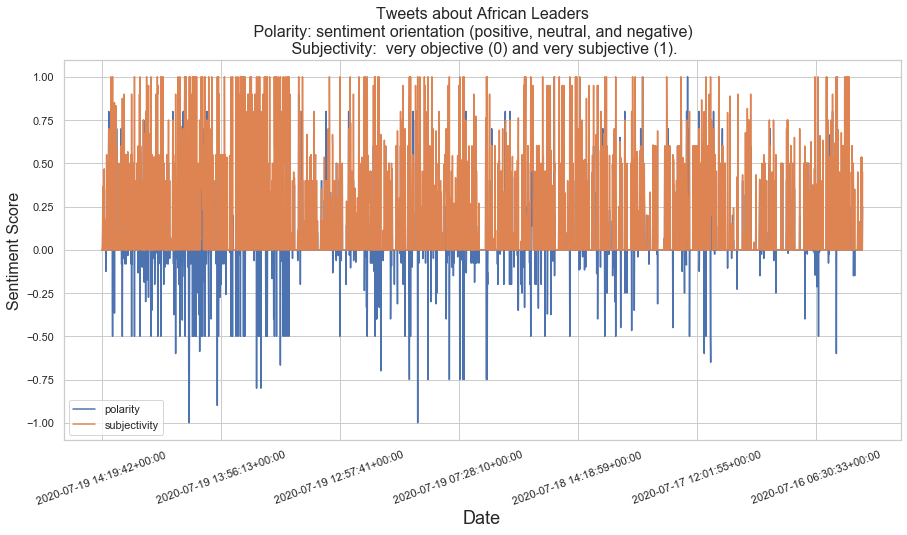

In [9]:
Leaders_Tweets['polarity'] = pd.to_numeric(Leaders_Tweets['polarity'])
Leaders_Tweets['subjectivity'] = pd.to_numeric(Leaders_Tweets['subjectivity'])

#df.info()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Tweets about African Leaders\n Polarity: sentiment orientation (positive, neutral, and negative) \
    \n Subjectivity:  very objective (0) and very subjective (1).', fontsize=16)
with sns.axes_style("whitegrid"):
    Leaders_Tweets[['polarity','subjectivity']].plot(ax=ax)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Sentiment Score', fontsize=16)
plt.xticks(rotation=20)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 <a list of 9 Text xticklabel objects>)

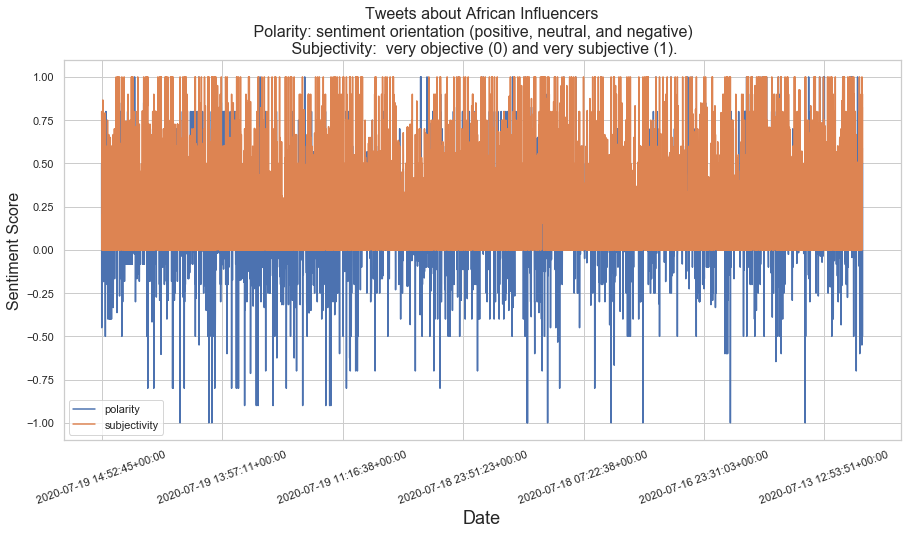

In [10]:
Influencers_Tweets['polarity'] = pd.to_numeric(Influencers_Tweets['polarity'])
Influencers_Tweets['subjectivity'] = pd.to_numeric(Influencers_Tweets['subjectivity'])

#df.info()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Tweets about African Influencers\n Polarity: sentiment orientation (positive, neutral, and negative) \
    \n Subjectivity:  very objective (0) and very subjective (1).', fontsize=16)
with sns.axes_style("whitegrid"):
    Influencers_Tweets[['polarity','subjectivity']].plot(ax=ax)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Sentiment Score', fontsize=16)
plt.xticks(rotation=20)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text xticklabel objects>)

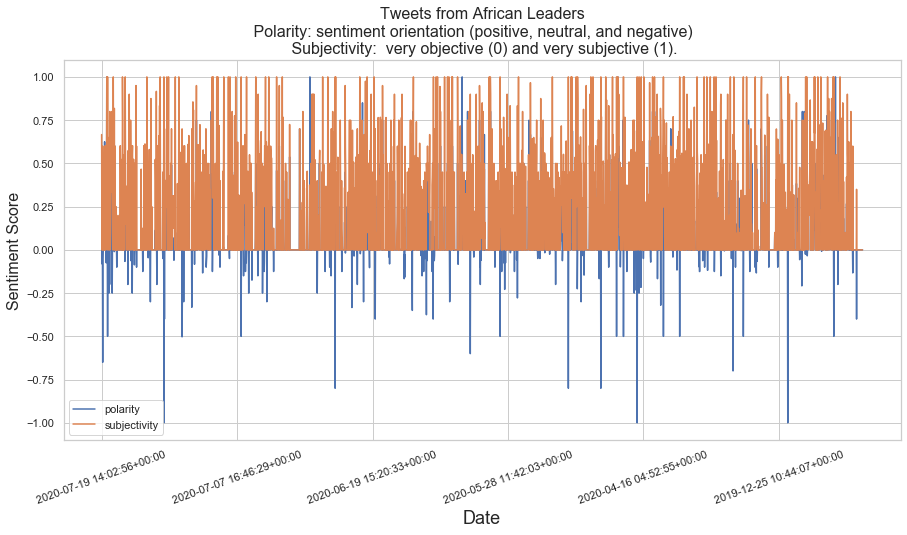

In [11]:
Leaders_Tweets_User['polarity'] = pd.to_numeric(Leaders_Tweets_User['polarity'])
Leaders_Tweets_User['subjectivity'] = pd.to_numeric(Leaders_Tweets_User['subjectivity'])

#df.info()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Tweets from African Leaders\n Polarity: sentiment orientation (positive, neutral, and negative) \
    \n Subjectivity:  very objective (0) and very subjective (1).', fontsize=16)
with sns.axes_style("whitegrid"):
    Leaders_Tweets_User[['polarity','subjectivity']].plot(ax=ax)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Sentiment Score', fontsize=16)
plt.xticks(rotation=20)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text xticklabel objects>)

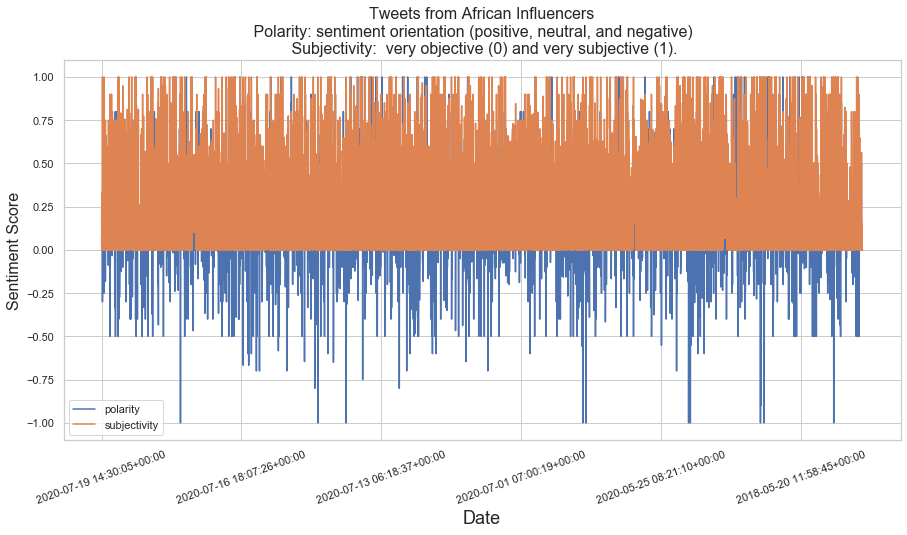

In [12]:
Influencers_Tweets_User['polarity'] = pd.to_numeric(Influencers_Tweets_User['polarity'])
Influencers_Tweets_User['subjectivity'] = pd.to_numeric(Influencers_Tweets_User['subjectivity'])

#df.info()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Tweets from African Influencers\n Polarity: sentiment orientation (positive, neutral, and negative) \
    \n Subjectivity:  very objective (0) and very subjective (1).', fontsize=16)
with sns.axes_style("whitegrid"):
    Influencers_Tweets_User[['polarity','subjectivity']].plot(ax=ax)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Sentiment Score', fontsize=16)
plt.xticks(rotation=20)

##### Reach Score

In [13]:
Leaders_Account = pd.read_csv('data/leaders_reach.csv',delimiter=',') 
Influencers_Account = pd.read_csv('data/influencers_reach.csv',delimiter=',')
Leaders_Account = Leaders_Account.sort_values(by=['reach_score'], ascending=False)
Influencers_Account = Influencers_Account.sort_values(by=['reach_score'], ascending=False)

In [14]:
Leaders_Account = Leaders_Account.rename(columns={'Username':'original_author'})
Influencers_Account = Influencers_Account.rename(columns={'Username':'original_author'})

##### Retweet influence... Popularity score

In [39]:
Leaders_Tweets_User['retweet_count'] = pd.to_numeric(Leaders_Tweets_User['retweet_count'])
Leaders_Tweets_User['favorite_count'] = pd.to_numeric(Leaders_Tweets_User['favorite_count'])

Leaders_Tweets_User_Popularity = Leaders_Tweets_User.loc[:,['original_author','retweet_count','favorite_count']]

Influencers_Tweets_User['retweet_count'] = pd.to_numeric(Influencers_Tweets_User['retweet_count'])
Influencers_Tweets_User['favorite_count'] = pd.to_numeric(Influencers_Tweets_User['favorite_count'])

Influencers_Tweets_User_Popularity = Influencers_Tweets_User.loc[:,['original_author','retweet_count','favorite_count']] 

Leaders_Tweets_User_Popularity['popularity_score']= Leaders_Tweets_User_Popularity['retweet_count'] + Leaders_Tweets_User_Popularity['favorite_count']
Influencers_Tweets_User_Popularity['popularity_score']= Influencers_Tweets_User_Popularity['retweet_count'] + Influencers_Tweets_User_Popularity['favorite_count']

Leaders_Tweets_User_Popularity = Leaders_Tweets_User_Popularity.groupby('original_author', as_index=False).mean().sort_values(by=['popularity_score'], ascending=False)
Influencers_Tweets_User_Popularity = Influencers_Tweets_User_Popularity.groupby('original_author', as_index=False).mean().sort_values(by=['popularity_score'],ascending=False)

###### Mentions

In [40]:
#get the mentions
leader_mentions = Leaders_Tweets_User['user_mentions']
influencer_mentions = Influencers_Tweets_User['user_mentions']
leader_mentions = [mention for mention in leader_mentions if str(mention) != 'nan']
influencer_mentions = [mention for mention in influencer_mentions if str(mention) != 'nan']


In [48]:
leaders_username = []
for leader in leader_mentions:
    try:
        x = leader.split(', ')
        leaders_username.extend(x)
    except AttributeError:
        continue
        
influencers_username = []
for influencer in influencer_mentions:
    try:
        x = influencer.split(', ')
        influencers_username.extend(x)
    except AttributeError:
        continue

In [92]:
leader_mentions_count = []
for x in leaders_username:
    line = []
    counter = leader_mentions.count(x)
    line.extend([x,counter])
    leader_mentions_count.append(line)
    
influencers_mentions_count = []
for x in influencers_username:
    line = []
    counter = influencer_mentions.count(x)
    line.extend([x,counter])
    influencers_mentions_count.append(line)

In [93]:
leader_mentions_count = pd.DataFrame(leader_mentions_count).rename(columns={0:'Username',1:'Number of Mentions'})
influencers_mentions_count = pd.DataFrame(influencers_mentions_count).rename(columns={0:'Username',1:'Number of Mentions'})

In [94]:
leader_mentions_count = leader_mentions_count.sort_values(by=['Number of Mentions'], ascending=False)
influencers_mentions_count = influencers_mentions_count.sort_values(by=['Number of Mentions'], ascending=False)

In [95]:
influencers_mentions_count

,Username,Number of Mentions
4516,KofiAnnan,15
4506,KofiAnnan,15
4517,KofiAnnan,15
4525,KofiAnnan,15
4527,KofiAnnan,15
...,...,...
2950,chimbangu1,0
1041,ThabisoTema,0
2952,spiderman1912,0
1040,Sentletse,0


In [52]:
leader_influence = pd.merge(Leaders_Account, Leaders_Tweets_User_Popularity, on='original_author')
influencer_influence = pd.merge(Influencers_Account, Influencers_Tweets_User_Popularity, on='original_author')

In [53]:
leader_influence = pd.merge(leader_influence, leader_mentions_count, on='original_author')
influencer_influence = pd.merge(influencer_influence, influencers_mentions_count, on='original_author')

In [54]:
leader_influence['type'] = 'Leader'
influencer_influence['type']='Influencer'

In [55]:
p_leader_influence = leader_influence.sort_values(by=['popularity_score'], ascending=False)
p_influencer_influence = influencer_influence.sort_values(by=['popularity_score'], ascending=False)

In [56]:
top_p_lead = p_leader_influence.head(10)
top_p_infl = p_influencer_influence.head(10)

In [57]:
top_p_lead[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
3,PaulKagame,1984076,4095.858696,2
4,PaulKagame,1984076,4095.858696,2
5,PaulKagame,1984076,4095.858696,2
6,PaulKagame,1984076,4095.858696,2
7,PaulKagame,1984076,4095.858696,2
8,PaulKagame,1984076,4095.858696,2
61,M_Farmaajo,424420,2324.837838,1
60,M_Farmaajo,424420,2324.837838,1
62,SudanPMHamdok,370948,2212.464286,2
63,SudanPMHamdok,370948,2212.464286,2


In [58]:
top_p_infl[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
10,Julius_S_Malema,3129042,8181.666667,1
8,Julius_S_Malema,3129042,8181.666667,1
11,Julius_S_Malema,3129042,8181.666667,1
9,Julius_S_Malema,3129042,8181.666667,1
52,GautengProvince,214128,152.156250,0
51,GautengProvince,214128,152.156250,0
1,News24,3577371,91.979798,3
0,News24,3577371,91.979798,3
7,News24,3577371,91.979798,3
6,News24,3577371,91.979798,3


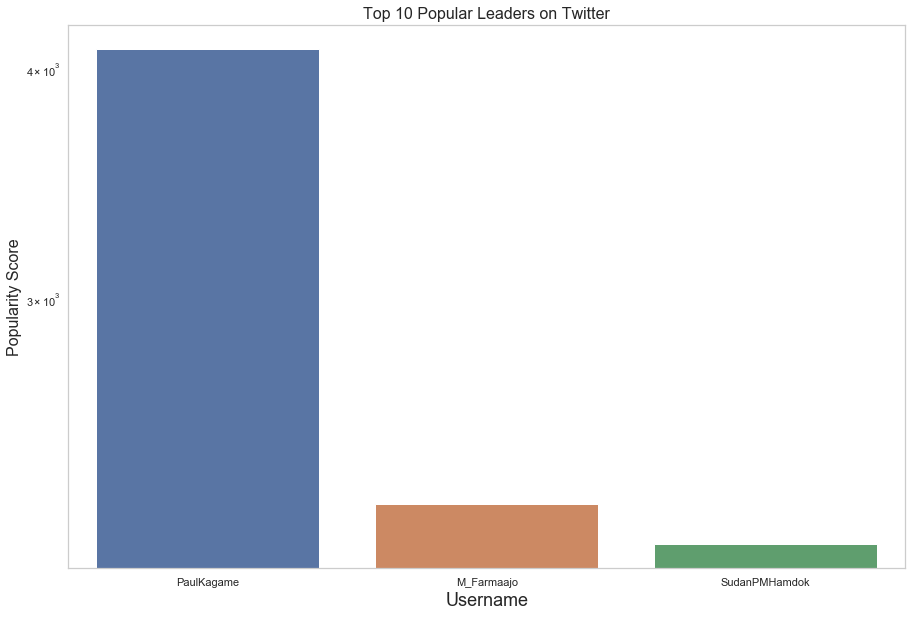

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Popular Leaders on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="popularity_score", data=top_p_lead)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Popularity Score', fontsize=16)
plt.yscale('log')
plt.savefig("img/Top 10 Popular Leaders on Twitter.png")
plt.show()

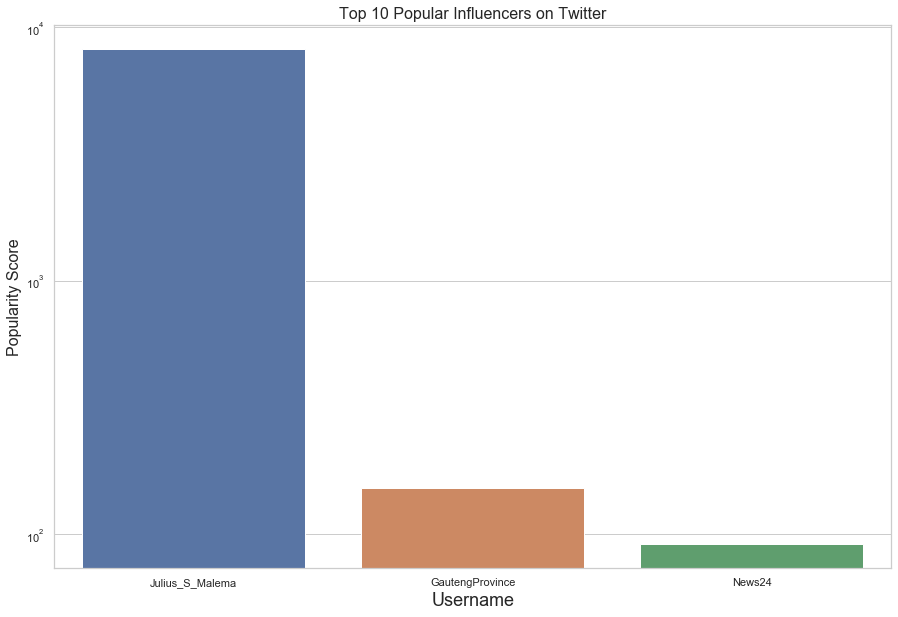

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Popular Influencers on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="popularity_score", data=top_p_infl)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Popularity Score', fontsize=16)
plt.yscale('log')
plt.savefig("img/Top 10 Popular Influencers on Twitter.png")
plt.show()

In [61]:
r_leader_influence = leader_influence.sort_values(by=['Number of Mentions'], ascending=False)
r_influencer_influence = influencer_influence.sort_values(by=['Number of Mentions'], ascending=False)

In [62]:
top_r_lead = r_leader_influence.head(10)
top_r_infl = r_influencer_influence.head(10)

In [63]:
top_r_lead[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
48,Macky_Sall,1375550,1030.57732,35
34,Macky_Sall,1375550,1030.57732,35
25,Macky_Sall,1375550,1030.57732,35
26,Macky_Sall,1375550,1030.57732,35
27,Macky_Sall,1375550,1030.57732,35
28,Macky_Sall,1375550,1030.57732,35
29,Macky_Sall,1375550,1030.57732,35
30,Macky_Sall,1375550,1030.57732,35
31,Macky_Sall,1375550,1030.57732,35
32,Macky_Sall,1375550,1030.57732,35


In [64]:
top_r_infl[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
23,_AfricanUnion,541345,66.661538,4
18,_AfricanUnion,541345,66.661538,4
16,_AfricanUnion,541345,66.661538,4
19,_AfricanUnion,541345,66.661538,4
20,_AfricanUnion,541345,66.661538,4
21,_AfricanUnion,541345,66.661538,4
22,_AfricanUnion,541345,66.661538,4
24,_AfricanUnion,541345,66.661538,4
17,_AfricanUnion,541345,66.661538,4
71,AfricaCheck,63482,8.819149,3


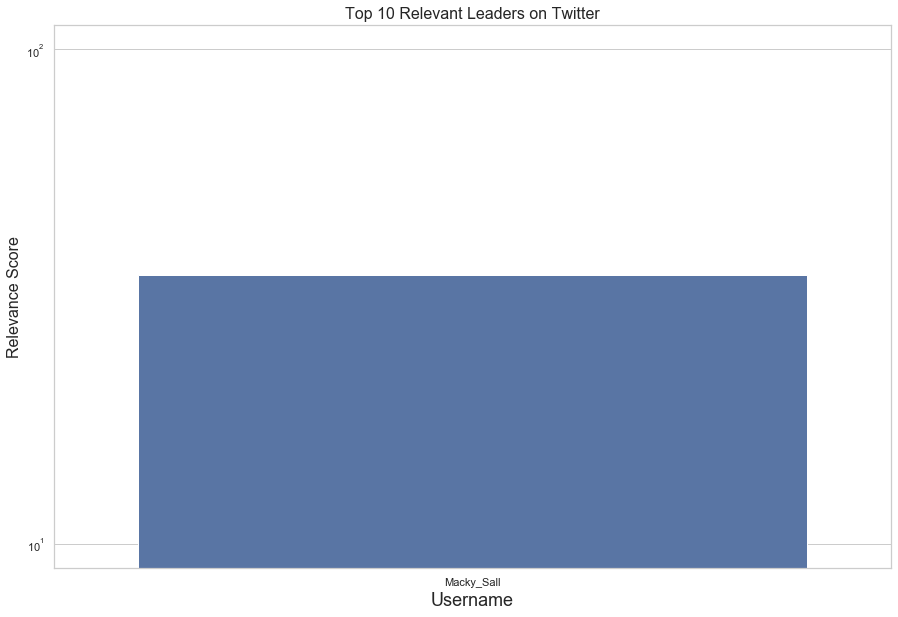

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Relevant Leaders on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="Number of Mentions", data=top_r_lead)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Relevance Score', fontsize=16)
plt.yscale('log')
plt.savefig("img/Top 10 Relevant Leaders on Twitter.png")
plt.show()

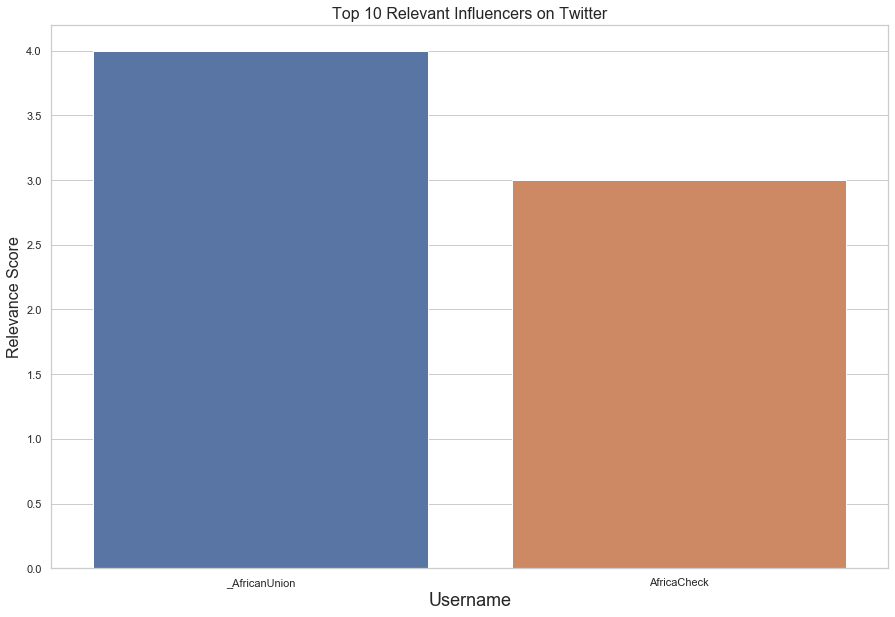

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Relevant Influencers on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="Number of Mentions", data=top_r_infl)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Relevance Score', fontsize=16)
plt.savefig("img/Top 10 Relevant Influencers on Twitter.png")
plt.show()

In [67]:
re_leader_influence = leader_influence.sort_values(by=['reach_score'], ascending=False)
re_influencer_influence = influencer_influence.sort_values(by=['reach_score'], ascending=False)

In [68]:
top_re_lead = re_leader_influence.head(10)
top_re_infl = re_influencer_influence.head(10)

In [69]:
top_re_infl[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
0,News24,3577371,91.979798,3
2,News24,3577371,91.979798,3
3,News24,3577371,91.979798,3
4,News24,3577371,91.979798,3
5,News24,3577371,91.979798,3
6,News24,3577371,91.979798,3
7,News24,3577371,91.979798,3
1,News24,3577371,91.979798,3
11,Julius_S_Malema,3129042,8181.666667,1
10,Julius_S_Malema,3129042,8181.666667,1


In [70]:
top_re_lead[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
0,MBuhari,3272195,1142.960000,3
2,MBuhari,3272195,1142.960000,3
1,MBuhari,3272195,1142.960000,3
3,PaulKagame,1984076,4095.858696,2
5,PaulKagame,1984076,4095.858696,2
6,PaulKagame,1984076,4095.858696,2
7,PaulKagame,1984076,4095.858696,2
8,PaulKagame,1984076,4095.858696,2
4,PaulKagame,1984076,4095.858696,2
9,KagutaMuseveni,1813653,1861.070707,1


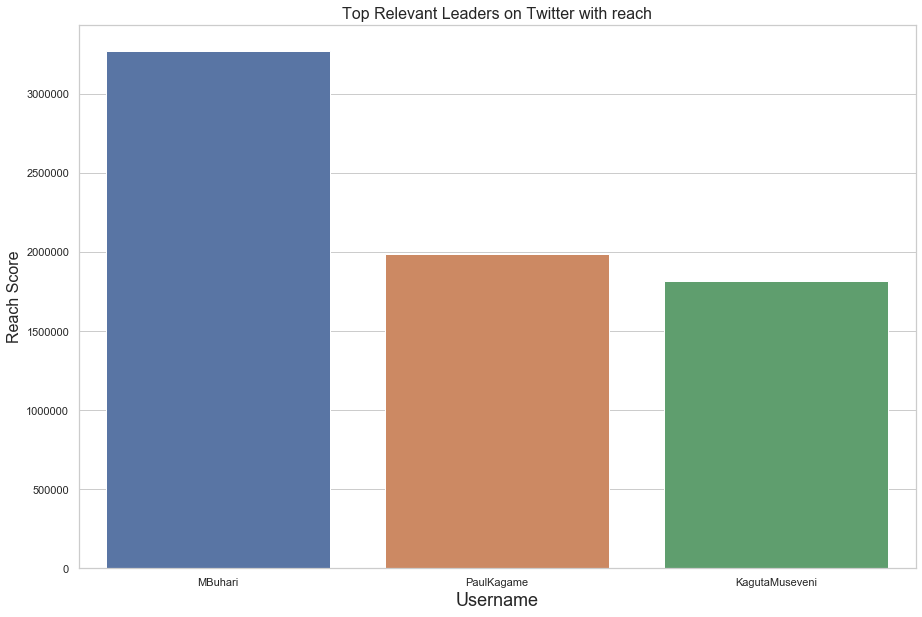

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top Relevant Leaders on Twitter with reach', fontsize=16)
ax = sns.barplot(x="original_author", y="reach_score", data=top_re_lead)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Reach Score', fontsize=16)
plt.savefig("img/Top Relevant Leaders on Twitter with reach.png")
plt.show()

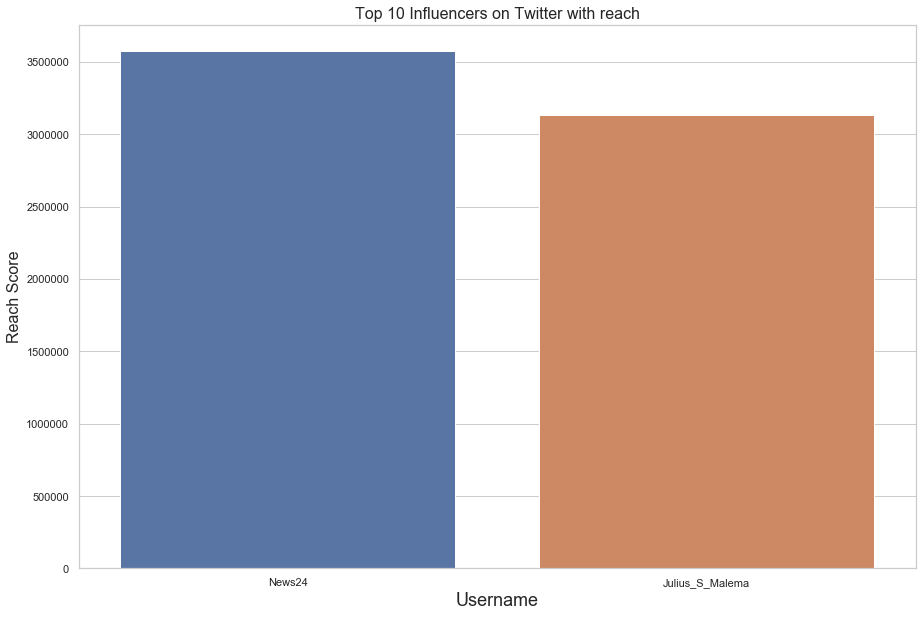

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Influencers on Twitter with reach', fontsize=16)
ax = sns.barplot(x="original_author", y="reach_score", data=top_re_infl)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Reach Score', fontsize=16)
plt.savefig("img/Top 10 Influencers on Twitter with reach.png")
plt.show()

In [80]:
#Getting the 10 most liked tweets
Top_Leaders_Tweets_User = Leaders_Tweets_User.sort_values(by=['favorite_count'], ascending=False)
Top_Leaders_Tweets_User_Tags = Top_Leaders_Tweets_User['hashtags']

#Getting the 10 most liked tweets
Top_Influencers_Tweets_User = Influencers_Tweets_User.sort_values(by=['favorite_count'], ascending=False)
Top_Influencers_Tweets_User_Hashtags = Top_Influencers_Tweets_User['hashtags']


In [81]:
leaders_hashtags = []
for leader in Top_Leaders_Tweets_User_Tags:
    try:
        x = leader.split(', ')
        leaders_hashtags.extend(x)
    except AttributeError:
        continue
        
influencers_hashtags = []
for influencer in Top_Influencers_Tweets_User_Hashtags:
    try:
        x = influencer.split(', ')
        influencers_hashtags.extend(x)
    except AttributeError:
        continue

In [82]:
influencers_hashtags

['JusticeForGeorgeFloyd',
 'MakhayaNtini',
 'MalemaReturnsToANC',
 'EFFWayawaya',
 'RIPMaryTwala',
 'COVID19',
 'GAUTENGCOVID19',
 'COVID19SA',
 'ProteaFire',
 'DecapitateColonialStatues',
 'BlackLivesMatter',
 'SolidarityCup',
 '3TCricket',
 'RainStartsPlay',
 'Kenyan',
 'alcoholban',
 'AlcoholHasFallen',
 '3TCricket',
 'RainStartsPlay',
 'SolidarityCup',
 'SoWhatNow',
 'TyingTheTebow',
 'BlackLivesMatter',
 'TheOne',
 'FreshCut',
 'SolidarityCup',
 '3TCricket',
 'RainStartsPlay',
 'LiveAMP',
 'audisouthafrica',
 'audiQ3Sportback',
 'Q3Sportback',
 'Whateverthatmeans',
 'MTVBasebirthday',
 '54Seconds',
 'BlackLivesMatter',
 'LiveAMP',
 'SamsungWashingMachines',
 'ColonialStatuesMustFall',
 'LabourReport',
 'LiveAMP',
 'LiveAMP',
 'SoWhatNow',
 'DJSBU',
 'SolidarityCup',
 '3TCricket',
 'RainStartsPlay',
 'SoWhatNow',
 'LiberationDay',
 'Kwibohora',
 'MIFKigali',
 'Morocco',
 'COVID19',
 'AfricaResponds',
 'SolidarityCup',
 'RainStartsPlay',
 '10yearsOfBlackMotion',
 'LiveAMP',
 '100day

In [43]:
p_influencers = pd.concat([top_p_infl, top_p_lead], axis=0).sort_values(by=['popularity_score'], ascending=False)
r_influencers = pd.concat([top_r_infl, top_r_lead], axis=0).sort_values(by=['Number of Mentions'], ascending=False)
re_influencers = pd.concat([top_re_infl, top_re_lead], axis=0).sort_values(by=['reach_score'], ascending=False)

In [44]:
p_influencers[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
0,Trevornoah,10808159,40121.130435,0
4,NAkufoAddo,1508049,8831.763158,0
2,Julius_S_Malema,3129042,8181.666667,1
1,PaulKagame,1984076,4095.858696,2
9,MbuyiseniNdlozi,1072689,3595.000000,0
19,CheikhGhazouani,31796,2385.600000,0
8,M_Farmaajo,424420,2324.837838,1
9,SudanPMHamdok,370948,2212.464286,2
2,KagutaMuseveni,1813653,1861.070707,1
7,edmnangagwa,546415,1585.698630,2


In [45]:
r_influencers[['original_author' , 'reach_score', 'popularity_score', 'Number of Mentions']]

,original_author,reach_score,popularity_score,Number of Mentions
5,Macky_Sall,1375550,1030.577320,35
15,_AfricanUnion,541345,66.661538,4
40,AfricaCheck,63482,8.819149,3
1,News24,3577371,91.979798,3
15,IssoufouMhm,116284,583.255102,3
0,MBuhari,3272195,1142.960000,3
56,hartleyr,34774,11.000000,2
39,HenleyAfrica,69121,4.342466,2
35,JamalMOsman,93302,48.560976,2
52,gertjohan,48945,31.610169,2


In [46]:
re_influencers

,Name,original_author,Number of Followers,Number of Following,Number of Retweets and Tweets,reach_score,retweet_count,favorite_count,popularity_score,Number of Mentions,type
0,Trevor Noah,Trevornoah,10808484,325,11186,10808159,8073.608696,32047.521739,40121.130435,0,Influencer
1,News24,News24,3578002,631,322905,3577371,23.585859,68.393939,91.979798,3,Influencer
0,Muhammadu Buhari,MBuhari,3272221,26,4734,3272195,230.230000,912.730000,1142.960000,3,Leader
2,Julius Sello Malema,Julius_S_Malema,3129694,652,37219,3129042,1339.750000,6841.916667,8181.666667,1,Influencer
1,Paul Kagame,PaulKagame,1984257,181,2862,1984076,741.163043,3354.695652,4095.858696,2,Leader
3,Gareth Cliff,GarethCliff,1974614,356,31626,1974258,19.812500,112.520833,132.333333,0,Influencer
2,Yoweri K Museveni,KagutaMuseveni,1813681,28,6645,1813653,240.282828,1620.787879,1861.070707,1,Leader
4,Euphonik™♛,euphonik,1755494,65,4530,1755429,41.544118,349.441176,390.985294,0,Influencer
3,Presidency | South Africa 🇿🇦,PresidencyZA,1599328,14,18881,1599314,54.738095,133.178571,187.916667,0,Leader
4,Nana Akufo-Addo,NAkufoAddo,1508401,352,7098,1508049,1357.671053,7474.092105,8831.763158,0,Leader


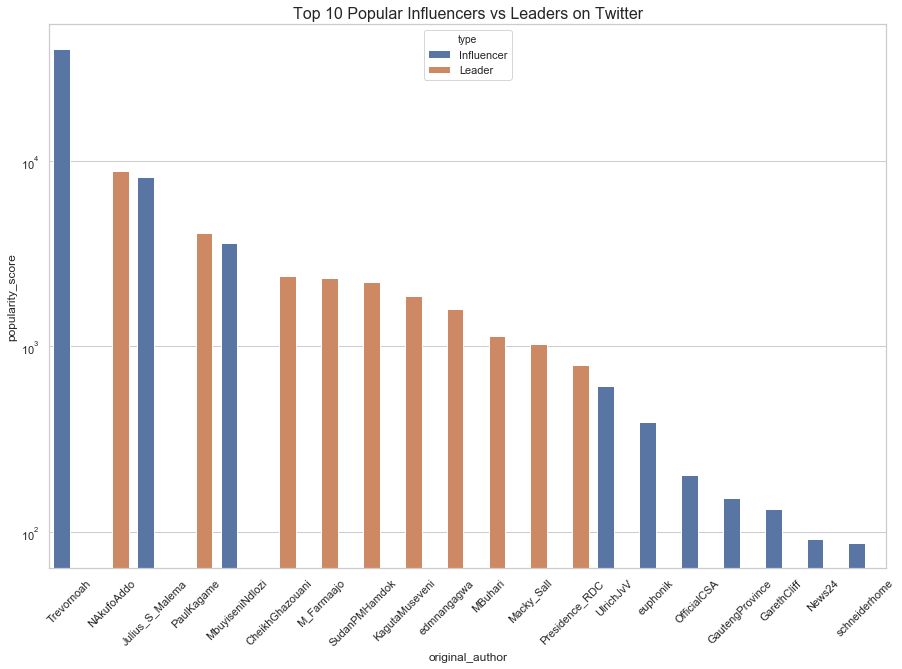

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Popular Influencers vs Leaders on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="popularity_score", data=p_influencers, hue = 'type')
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig("img/Top 10 Popular Influencers vs Leaders on Twitter.png")
plt.show()

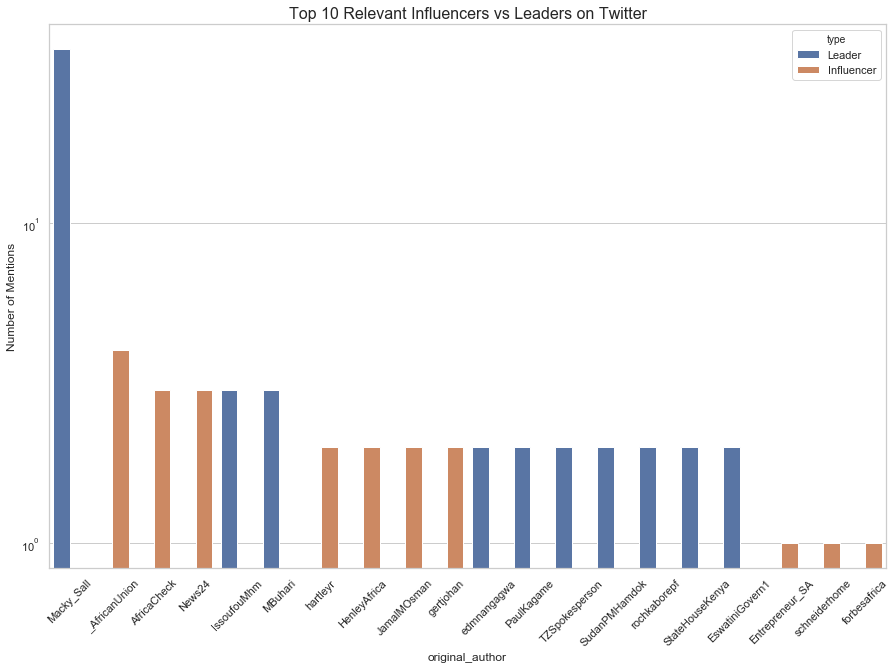

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Relevant Influencers vs Leaders on Twitter', fontsize=16)
ax = sns.barplot(x="original_author", y="Number of Mentions",hue="type", data=r_influencers)
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig("img/Top 10 Relevant Influencers vs Leaders on Twitter.png")
plt.show()

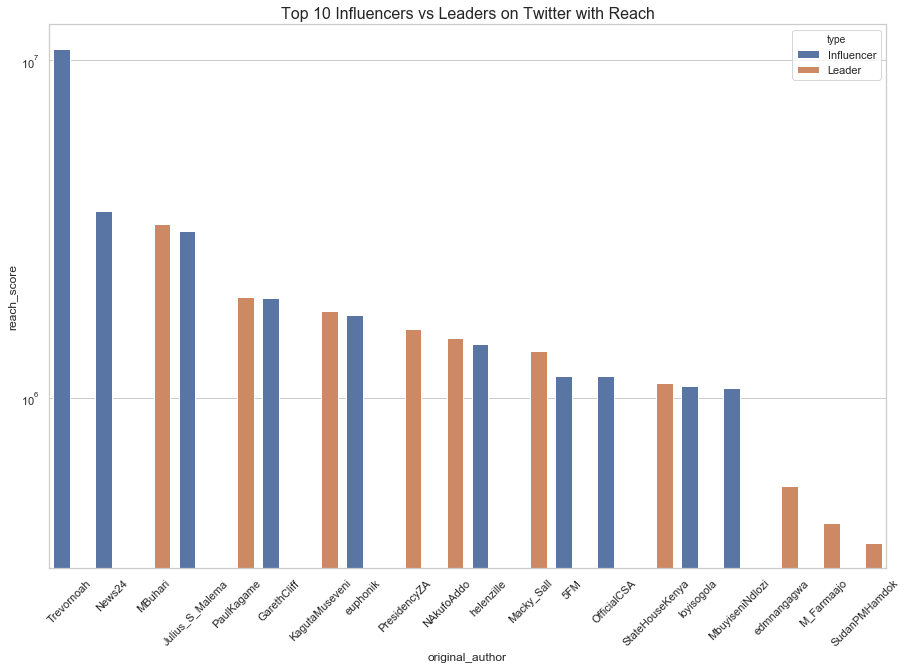

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 Influencers vs Leaders on Twitter with Reach', fontsize=16)
ax = sns.barplot(x="original_author", y="reach_score",hue="type", data=re_influencers)
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig("img/Top 10 Relevant Influencers vs Leaders on Twitter.png")
plt.show()